In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import Request, urlopen
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', None)
plt.style.use('classic')
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-darkgrid')

In [ ]:
%matplotlib inline
plt.style.use("dark_background")

In [ ]:
#ESS Round 8: European Social Survey Round 8 Data (2016). Data file edition 2.1. NSD - Norwegian Centre for Research Data, Norway – Data Archive and distributor of ESS data for ESS ERIC. doi:10.21338/NSD-ESS8-2016.
#Source Questionnaires at https://www.europeansocialsurvey.org/docs/round8/fieldwork/source/ESS8_source_questionnaires.pdf
req = Request('http://ivanachille.com/publicdata/european-social-survey/processed/data_cleaned.csv')
req2 = Request('http://ivanachille.com/publicdata/european-social-survey/processed/vars_cleaned.csv')
req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
req2.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
content = urlopen(req)
content2 = urlopen(req2)

data = pd.read_csv(content)
vars = pd.read_csv(content2)

In [ ]:
#temporary functions
def spl(v):
  return psvp_labels[psvp.index(v)]

def SortedR2(var):
  corrs = []
  for i in range(len(psvp)):
    cm = np.corrcoef(data[var],data[psvp[i]])**2
    nm = psvp[i]
    corrs.append([cm[0][1],nm])
  a = sorted(corrs)
  return a[::-1][:10]

def plot_init():
  return plt.figure(figsize=(14,8))

def rev(data, high):
  #high: highest rank within scale
  #reverses scores of ranking-type data, convenient for data visualisation.
    data = high - data
    return data

def SearchVar(name):
  return vars[vars['Name']==name]

def lb(label):
  return vars[vars['Label']==label]['Name']

<br>

# Case Study: Sociopolitical beliefs and opinion
There are a lot of edges within the spectrum of populations' beliefs, these may be modelled and malleableized by different modelling functions applied to the underlying principles that social viewpoints emerge from.

In [ ]:
vars['Group'].unique()

array(['Group Country', 'Group Weights', 'Group Media and social trust',
       'Group Climate change', 'Group Welfare attitudes',
       'Group Human values', 'Group Politics',
       'Group Subjective well-being, social exclusion, religion, national and ethnic identity',
       'Group Socio-demographics',
       'Group Gender, Year of birth and Household grid'], dtype=object)

In [ ]:
sociodemographics = vars[vars['Group']=='Group Socio-demographics']['Name'].unique()

In [ ]:
beliefs_opinion = ['wrclmch','trstplt','freehms','ppltrst']

In [ ]:
SearchVar("imueclt")

,Unnamed: 0,Name,Label,Country_specific,Scale_type,Type,Format,Valid,Invalid,Question,Group
135,99,imueclt,Country's cultural life undermined or enriched by immigrants,no,ordinal,discrete,numeric-2.0,42984,0,"B42 And, using this card, would you say that [country]'s cultural life is generally undermined or enriched by people coming to live here from other countries?",Group Politics


In [ ]:
set(data["sbeqsoc"])

{1, 2, 3, 4, 5}

I will be using these variables for the sake of this case study. Also, I'm making use of, as a starting point, that beliefs and opinion can be split between soft and hard, being the first the one that it is to model for malleability purposes, and the latter being the "fixed" credence of the individuals determined mainly by sociodemographic/economic factors that also exert influence on psychographics, which leads to the certain tendencies they develop towards specific aims .

In [ ]:
set(data['trstplt'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [ ]:
sociodemographics

array(['lvgptnea', 'dvrcdeva', 'marsts', 'eduyrs', 'pdwrk', 'edctn',
       'uempla', 'uempli', 'dsbld', 'rtrd', 'cmsrv', 'hswrk', 'dngoth',
       'dngref', 'dngdk', 'dngna', 'icomdng', 'mainact', 'mnactic',
       'icpdwrk', 'crpdwk', 'pdjobev', 'pdjobyr', 'emplrel', 'emplno',
       'wrkctra', 'estsz', 'jbspv', 'njbspv', 'wkdcorga', 'iorgact',
       'wkhct', 'icwhct', 'wkhtot', 'nacer2', 'tporgwk', 'isco08',
       'wrkac6m', 'uemp3m', 'uemp12m', 'uemp5yr', 'mbtru', 'hincsrca',
       'hinctnta', 'hincfel', 'edulvlb'], dtype=object)

In [ ]:
def trf(rcl,pos):
  if rcl.iloc[pos]<=3:
    return 0
  if rcl.iloc[pos]>=4:
    return 1

In [ ]:
psy_vars =  ['impfun','imptrad','impenv','iplylfr','iprspot','ipbhprp','ipadvnt','ipstrgv',
                'ipsuces','iphlppl','impfree','ipgdtim','ipmodst','ipudrst','ipfrule','impdiff','impsafe','ipshabt','imprich','ipcrtiv']

In [ ]:
dss = data[psy_vars]

In [ ]:
psychographics_binarized_data = pd.DataFrame()

In [ ]:
for i in range(len(psy_vars)):
  psv = psy_vars[i]
  psychographics_binarized_data[psv] = [trf(dss[psv],i) for i in range(len(dss))] #constraints data to binary output

In [ ]:
to_transform = np.array( data["agea"]  ).reshape(-1,1)
age_scaled = to_transform/(2*(np.std(to_transform)))
psychographics_binarized_data["age"] = age_scaled

to_transform = np.array( data["eduyrs"]  ).reshape(-1,1)
eduyrs_scaled = to_transform/(2*(np.std(to_transform)))
psychographics_binarized_data["eduyrs"] = eduyrs_scaled

#scale numeric data by dividing by two stds in order to put them in the approximately same scale as 0/1 variables.

In [ ]:
dss

,impfun,imptrad,impenv,iplylfr,iprspot,ipbhprp,ipadvnt,ipstrgv,ipsuces,iphlppl,impfree,ipgdtim,ipmodst,ipudrst,ipfrule,impdiff,impsafe,ipshabt,imprich,ipcrtiv
0,3,6,1,1,1,6,3,6,2,1,3,4,2,1,5,3,2,2,6,2
1,5,5,2,2,2,5,5,4,3,3,2,3,4,3,5,3,5,3,6,3
2,3,2,2,1,3,3,6,1,6,3,2,2,3,2,5,6,1,4,5,3
3,2,2,3,2,2,4,3,2,3,3,2,2,2,2,3,3,2,2,3,2
4,1,4,1,1,3,2,5,4,3,1,1,1,1,3,5,3,3,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44382,1,1,2,1,2,2,1,1,1,1,1,1,2,4,5,1,1,2,2,1
44383,2,1,1,1,2,1,4,1,1,1,1,3,3,2,2,3,2,2,4,1
44384,5,2,1,2,1,1,4,2,2,2,1,4,1,2,1,2,1,1,6,2
44385,1,4,2,3,1,3,2,1,1,1,1,1,2,2,5,1,2,2,3,2


In [ ]:
psychographics_binarized_data

,impfun,imptrad,impenv,iplylfr,iprspot,ipbhprp,ipadvnt,ipstrgv,ipsuces,iphlppl,impfree,ipgdtim,ipmodst,ipudrst,ipfrule,impdiff,impsafe,ipshabt,imprich,ipcrtiv,age,eduyrs
0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0.914933,2.741545
1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1.399309,2.088796
2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,1,0,1.829866,1.697147
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.453129,1.566597
4,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0.538196,1.697147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44382,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1.749137,1.566597
44383,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1.076392,2.088796
44384,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1.695317,2.219346
44385,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.210941,2.349896


In [ ]:
def target_bin(target_variable,c1,c2):
  #c1: lower end treshold constraint, sets 0
  #c2: higher end treshold constraint, sets 1
  def transform_target(rcl,pos):
    if rcl.iloc[pos]<=c1:
      return 0
    if rcl.iloc[pos]>=c2:
      return 1
  return [transform_target(data[target_variable],i) for i in range(len(data))]

In [ ]:
set(data["freehms"])

{1, 2, 3, 4, 5}

In [ ]:
y = target_bin("sblazy",2,3) #constraints data to binary output

(array([18045.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 26342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

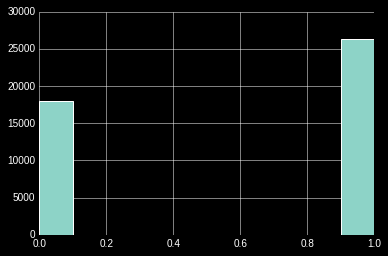

In [ ]:
plt.hist(y)

In [ ]:
x_pbd_train = psychographics_binarized_data.head(31071)
x_pbd_test = psychographics_binarized_data.tail(13316)

In [ ]:
y_train = y[:31071]
y_test = y[-13316:]

<br>

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier(max_features="auto",random_state=0).fit(x_pbd_train,y_train)

In [ ]:
from sklearn.metrics import f1_score
y_pred = model.predict(x_pbd_test)

In [ ]:
f1_score(y_test, y_pred)

0.5969864581346557

In [ ]:
model.score(x_pbd_test,y_test)

0.5239561429858817

<br>

### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

model =  GaussianNB(var_smoothing=0.000001).fit(x_pbd_train,y_train)
y_pred = model.predict(x_pbd_test)

In [ ]:
f1_score(y_test, y_pred)

0.6428197522247426

In [ ]:
model.score(x_pbd_test,y_test)

0.5388254731150496

<br>

### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model =  KNeighborsClassifier(n_neighbors=5).fit(x_pbd_train,y_train)

In [ ]:
y_pred = model.predict(x_pbd_test)

In [ ]:
f1_score(y_test, y_pred)

0.6302158273381294

In [ ]:
model.score(x_pbd_test,y_test)

0.5367978371883448

<br>

### LinearSVC

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
model = LinearSVC(max_iter=2000,class_weight='balanced').fit(x_pbd_train,y_train)

In [ ]:
y_pred = model.predict(x_pbd_test)

In [ ]:
f1_score(y_test, y_pred)

0.5500142085819836

In [ ]:
model.score(x_pbd_test,y_test)

0.5243316311204566

In [ ]:
y_pred[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0])

In [ ]:
model.coef_

array([[ 0.10401446,  0.05588754, -0.12125918, -0.02838007,  0.01144602,
         0.01027261,  0.05344043,  0.07557364, -0.02653053, -0.00116246,
        -0.0148786 , -0.03126747,  0.04967623, -0.09554854,  0.0136033 ,
         0.01252806,  0.06785929, -0.01000671,  0.03669438,  0.06424422,
        -0.05894853,  0.07032753]])

<br>

### Random Forests

In [ ]:
 from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0,min_samples_leaf=2).fit(x_pbd_train,y_train)

In [ ]:
y_pred = model.predict(x_pbd_test)

In [ ]:
f1_score(y_test, y_pred)

0.6892353695002136

In [ ]:
model.score(x_pbd_test,y_test)

0.5629318113547612

<u>Performance annotations on opinion variables:</u><br><br>
**sbeqsoc** -  BEST: Random Forests  - F1 0.586 / ACC 0.534<br>
**sblazy** - BEST: Random Forests - F1 0.690 / ACC 0.563<br>
**basinc** - BEST: Random Forests - F1 0.702 / ACC 0.593<br>
**imueclt** - BEST: GAUSSIANNB - F1 0.594 / ACC 0.620<br>
**imwbcnt** - BEST: GAUSSIANNB - F1 0.423 / ACC 0.653 <br>
**freehms** - BEST: GAUSSIANNB - F1 0.446 / ACC 0.673

In [ ]:
perform = pd.DataFrame()

In [ ]:
perform["op_var"] = ["sbeqsoc","sblazy","basinc","imueclt","imwbcnt","freehms"]
perform["best_model"] = ["Random Forests","Random Forests","Random Forests","GaussianNB","GaussianNB","GaussianNB"]
perform["f1"] = [0.586,0.690,0.702,0.594,0.423,0.446]
perform["acc"] = [0.534,0.563,0.593,0.620,0.653,0.673]

In [ ]:
perform

,op_var,best_model,f1,acc
0,sbeqsoc,Random Forests,0.586,0.534
1,sblazy,Random Forests,0.690,0.563
2,basinc,Random Forests,0.702,0.593
3,imueclt,GaussianNB,0.594,0.620
4,imwbcnt,GaussianNB,0.423,0.653
5,freehms,GaussianNB,0.446,0.673


Text(0, 0.5, 'F1 Score / Performance')

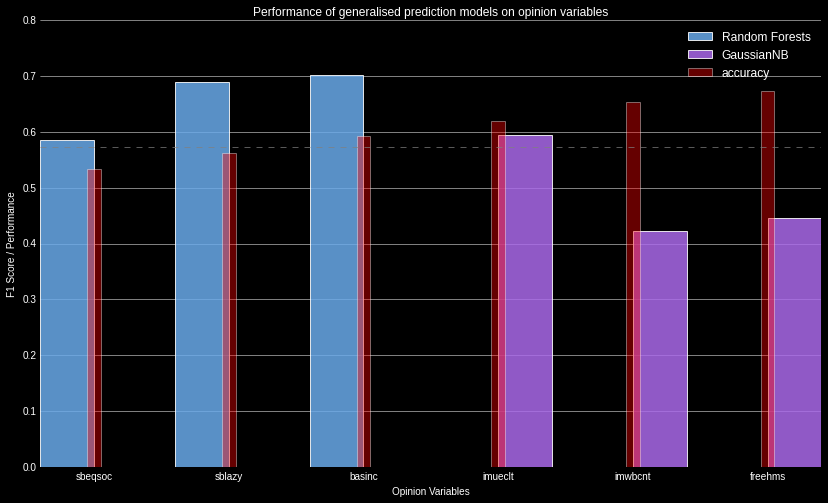

In [ ]:
plot_init()
plt.title("Performance of generalised prediction models on opinion variables")
sns.barplot(x="op_var", y="f1", hue="best_model",alpha=0.85, data=perform, palette="cool")
plt.bar(perform["op_var"],perform["acc"], width=0.1, color="red", alpha=0.4, label="accuracy")
plt.axhline(np.mean(perform["f1"]),linestyle="--", color="grey", alpha=0.7)
plt.legend()
plt.xlabel("Opinion Variables")
plt.ylabel("F1 Score / Performance")

As shown, generalised classification models<sup>(*)</sup> can fairly predict a human position on a subject given a psychographic baseline of the individual combined with some other sociodemographic information. I have chosen limited variables and binarized some for the sake of simplicity, in a particular case, specific feature-picking and modelling could be done in order to achieve a determined goal.

<i>(*) Meaning that separate models have not been specifically optimised to predict exclusively just one position/opinion.</i>

<br>

## Moving the human perspective
How can opinion be effectively manipulated? This could be easily done by simply reversing the way the previous prediction algorithm works, tweaking the entry parameters in order to get the desirable output. Let's see how this can be done.

In [ ]:
x_pbd_test.iloc[0] #current output 1, want to move it to 0

impfun     1.000000
imptrad    1.000000
impenv     1.000000
iplylfr    1.000000
iprspot    1.000000
ipbhprp    1.000000
ipadvnt    1.000000
ipstrgv    1.000000
ipsuces    1.000000
iphlppl    1.000000
impfree    0.000000
ipgdtim    1.000000
ipmodst    1.000000
ipudrst    1.000000
ipfrule    0.000000
impdiff    1.000000
impsafe    1.000000
ipshabt    1.000000
imprich    1.000000
ipcrtiv    1.000000
age        2.125874
eduyrs     0.913848
Name: 31071, dtype: float64

In [ ]:
cols = x_pbd_test.columns

In [ ]:
model = LinearSVC(max_iter=1000,class_weight='balanced',C=0.0001).fit(x_pbd_train,y_train)

Using a LinearSVC model as it allows access to model coefficients.

In [ ]:
yp_gen = model.predict(x_pbd_test)

In [ ]:
f1_score(y_test, yp_gen)

0.5701832050670844

In [ ]:
act_pred_compar = pd.DataFrame()
act_pred_compar["act"] = y_test
act_pred_compar["pred"] = yp_gen

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings

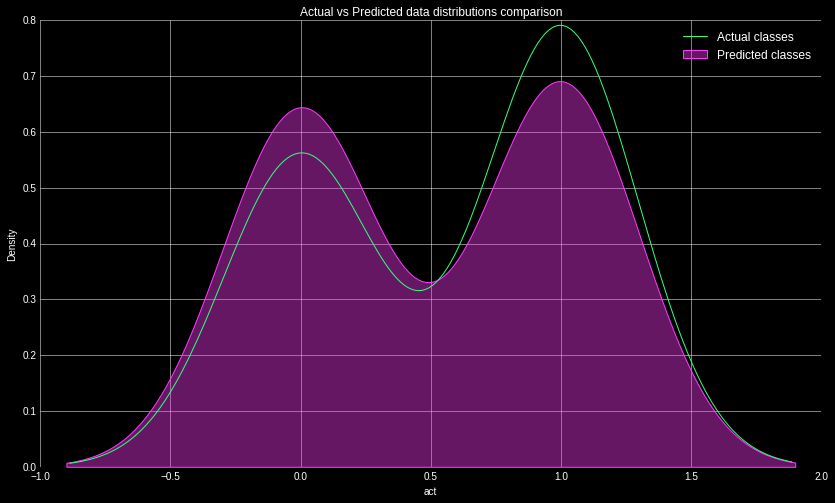

In [ ]:
plot_init()
plt.title("Actual vs Predicted data distributions comparison")
sns.kdeplot(act_pred_compar["act"], color="#32ff7e", bw=0.6, alpha=1,shade_lowest=True, label="Actual classes")
sns.kdeplot(act_pred_compar["pred"], color="#ff3bfc", shade="fill", bw=0.6, alpha=0.4,shade_lowest=True, label="Predicted classes")


plt.legend()

In [ ]:
model.coef_

array([[ 0.10401444,  0.05588766, -0.1212591 , -0.0283801 ,  0.01144606,
         0.01027265,  0.0534405 ,  0.07557364, -0.0265306 , -0.00116246,
        -0.01487868, -0.03126736,  0.04967631, -0.09554869,  0.01360324,
         0.01252798,  0.06785941, -0.01000671,  0.03669445,  0.06424413,
        -0.05894875,  0.07032718]])

In [ ]:
varcoefs = [(model.coef_.reshape(-1,1).tolist()[i][0],cols[i]) for i in range(len(cols))]

In [ ]:
sorted(varcoefs)

[(-0.12125909531129825, 'impenv'),
 (-0.09554869040294839, 'ipudrst'),
 (-0.05894874574929704, 'age'),
 (-0.03126735754803117, 'ipgdtim'),
 (-0.028380102185493028, 'iplylfr'),
 (-0.026530599081109385, 'ipsuces'),
 (-0.014878683972735007, 'impfree'),
 (-0.010006712035736665, 'ipshabt'),
 (-0.0011624552348440398, 'iphlppl'),
 (0.010272647591826278, 'ipbhprp'),
 (0.011446064642367637, 'iprspot'),
 (0.012527982814444005, 'impdiff'),
 (0.0136032430462526, 'ipfrule'),
 (0.03669444794970611, 'imprich'),
 (0.04967630650735133, 'ipmodst'),
 (0.05344050080271351, 'ipadvnt'),
 (0.055887655861402374, 'imptrad'),
 (0.06424412844184885, 'ipcrtiv'),
 (0.0678594089690922, 'impsafe'),
 (0.07032717664213857, 'eduyrs'),
 (0.07557363945051271, 'ipstrgv'),
 (0.10401443928835091, 'impfun')]

In [ ]:
sortedcoefs = sorted(model.coef_.reshape(-1,1).ravel().tolist())
coefs_notord = model.coef_.reshape(-1,1).ravel().tolist()

In [ ]:
y_test[40]

1

In [ ]:
instance = np.array(x_pbd_test.iloc[40])

In [ ]:
instance

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.45312899, 1.95824669])

In [ ]:
vcf = pd.DataFrame()
vcf["cols"] = cols
vcf["coef"] = model.coef_.reshape(1,-1)[0].tolist()

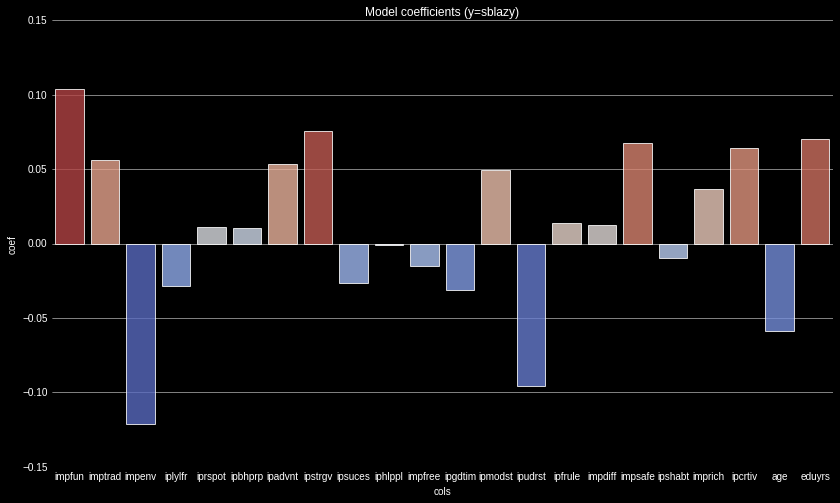

In [ ]:
plot_init()
sns.barplot(x="cols",y="coef", data=vcf, palette="coolwarm", hue="coef", dodge=False, alpha=0.8)

plt.title("Model coefficients (y=sblazy)")
plt.legend([],[], frameon=False)

In order to move a perspective all you have to do is change the critical points, which in a real application could be done, for example, with propaganda.

Text(0.5, 1.0, 'Model coefficients (y=sblazy)')

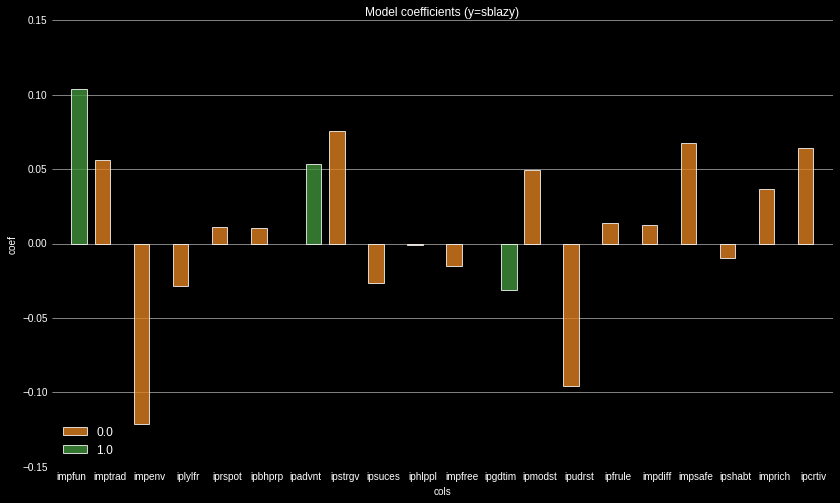

In [ ]:
plot_init()
sns.barplot(x="cols",y="coef", data=vcf[:20], palette="Paired_r", hue=instance[:20], dodge=True, alpha=0.8)

plt.title("Model coefficients colored by instance data (y=sblazy)")

Here, it can be seen that tweaking the impenv and ipudrst variable to 1 would fairly increase the chances of flipping the result as these are the negative coefficients that have the most impact on the classification, therefore, by increasing (in this case, flipping from 0 to 1) a negative coefficient, it will lean to the negative class.

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
calib = CalibratedClassifierCV(model).fit(x_pbd_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
tp = instance.reshape(1,-1)

In [ ]:
y_test[40]

1

In [ ]:
model.predict(tp)

array([1])

In [ ]:
calib.predict_proba(tp)

array([[0.39762764, 0.60237236]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Probabilities')

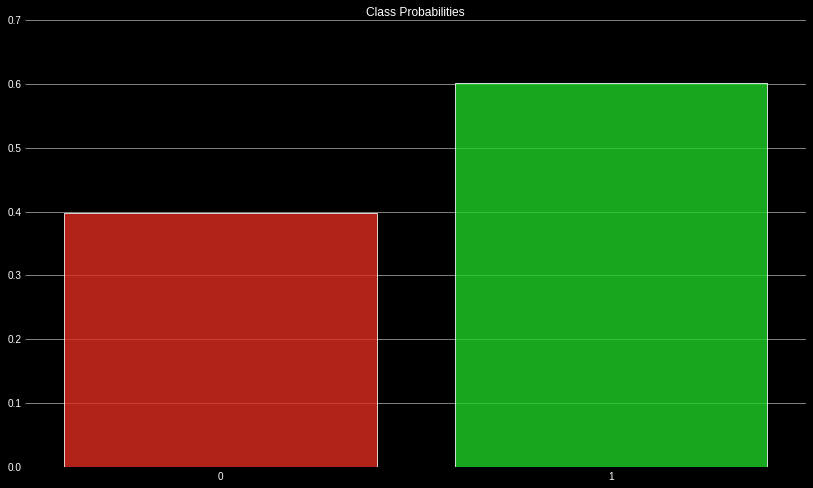

In [ ]:
plot_init()
sns.barplot([0,1],[0.39762764, 0.60237236], palette=["#ff1100","#00f00c"], alpha=.80)
plt.title("Class Probabilities")

In [ ]:
cols.tolist().index("ipudrst")

13

In [ ]:
tp2 = tp.reshape(-1,1)
tp2[13] = 1

tp2 = tp2.reshape(1,-1)

In [ ]:
calib.predict_proba(tp2)

array([[0.43060685, 0.56939315]])

The probabilities have partially shifted into the negative class, but not enough. Now let's also tweak the impenv variable.

In [ ]:
cols.tolist().index("impenv")

2

In [ ]:
tp2 = tp.reshape(-1,1)
tp2[2] = 1

tp2 = tp2.reshape(1,-1)

In [ ]:
calib.predict_proba(tp2)

array([[0.47288898, 0.52711102]])

Almost there, but still not enough, the classes are now balanced nearly a 50/50. One smart option would be to set the highest-impact positive classes to 0, so the negative class can take the reins.

In [ ]:
cols.tolist().index("impfun")

0

In [ ]:
cols.tolist().index("ipadvnt")

6

In [ ]:
tp2 = tp.reshape(-1,1)
tp2[0] = 0
tp2[6] = 0

tp2 = tp2.reshape(1,-1)

In [ ]:
calib.predict_proba(tp2)

array([[0.52989573, 0.47010427]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Probabilities')

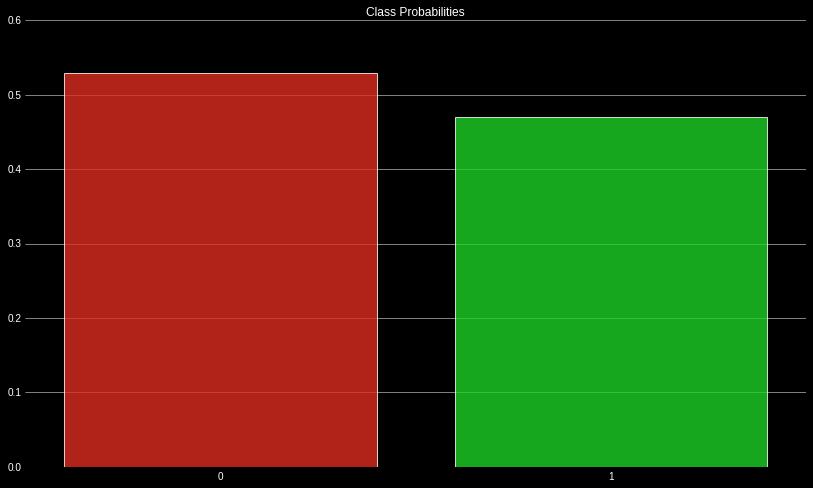

In [ ]:
plot_init()
sns.barplot([0,1],[0.52989573, 0.47010427], palette=["#ff1100","#00f00c"], alpha=.80)
plt.title("Class Probabilities")

Text(0.5, 1.0, 'Model coefficients (y=sblazy)')

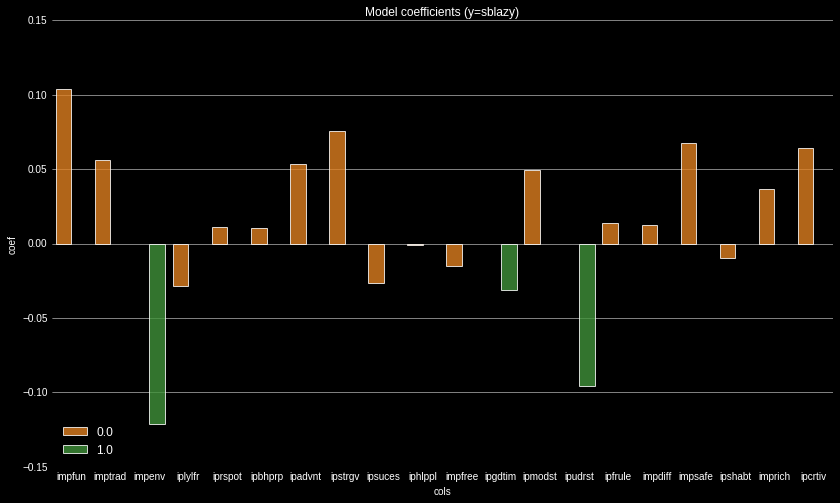

In [ ]:
plot_init()
sns.barplot(x="cols",y="coef", data=vcf[:20], palette="Paired_r", hue=tp2.reshape(22,)[:20], dodge=True, alpha=0.8)

plt.title("Model coefficients colored by instance data (y=sblazy)")

The probabilities have finally turned around, which means that a hypothetical human thought has just been manipulated through data-science-techniques. Of course, the probabilities are still quite even, and it took a good effort to finally overturn them, so this person would be called a "robust subject", given that manipulate its opinion isn't easy, further tweaking could be executed in theory, but in practice it would result in a difficult real-life implementation; this, always having in consideration the limited number of features selected for modelling, which have been constrained for the sake of simplicity.